This data analysis is on a dataset from Kaggle which is centered on data gotten from walmart stores on sales of coffee, stating the coffee types, prices, ratings, reviews, sellers and weights

First, i would import the libraries needed for this analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import dateutil.parser

pd.set_option('display.max_columns', 15)
pd.set_option('expand_frame_repr', True)

sns.set_palette('hls')
%matplotlib inline

Then i import my dataframe which i have named 'pers-data' for now 

In [2]:
#importing the dataframe to be analysed and setting the index to the first column

pers_data= pd.read_csv('coffee-listings-from-all-walmart-stores.csv', index_col='title')
pers_data

,coffee_type,rating,reviews,seller_name,thumbnail,price,weight,weight_formatted_to_gramms
title,,,,,,,,
"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,walmart.com,https://i5.walmartimages.com/asr/1fbbd523-8554...,13.92,40.3-ounce,1142.5
"café bustelo, espresso style dark roast ground coffee, vacuum-packed 10 oz. brick","espresso,dark roast",4.7,914,walmart.com,https://i5.walmartimages.com/asr/99a53df0-0471...,3.76,10 oz,283.5
"folgers classic roast ground coffee, medium roast coffee, 25.9 ounce canister","medium roast,classic roast",4.4,740,walmart.com,https://i5.walmartimages.com/asr/e6aba325-608e...,9.97,25.9 ounce,734.3
"maxwell house original roast ground coffee, 42.5 oz. canister",NaN,4.8,1321,walmart.com,https://i5.walmartimages.com/asr/a5be9586-b75d...,9.92,42.5 oz,1204.9
"great value classic roast medium ground coffee, value size, 48 oz",classic roast,4.7,1598,walmart.com,https://i5.walmartimages.com/asr/de42310c-4cd6...,9.98,48 oz,1360.8
...,...,...,...,...,...,...,...,...
xhao reusable capsules easy to clean easy to use 304 stainless steel stainless steel reusable capsules for coffee,NaN,0.0,0,joybuy selection,https://i5.walmartimages.com/asr/5aa587bd-9757...,13.89,not mentioned,272.2
cafe yaucono espresso dark roast ground coffee from puerto rico - 8.8 oz,"espresso,dark roast",0.0,0,"coffee & filters direct, inc",https://i5.walmartimages.com/asr/073bdc20-ad75...,10.99,8.8 oz,249.5
"starbucks dark roast coffee with 2x caffeine, k-cup coffee pods, 100% arabica, 12 ct","arabica,dark roast",4.3,5036,walmart.com,https://i5.walmartimages.com/asr/242294ac-0c7d...,12.98,12 c,340.2


The dataframe is named "pers_data and has 1400 rows and 8 columns

In [3]:
#checking the whole column headings of the dataframe

pers_data.columns.to_list()

['coffee_type',
 'rating',
 'reviews',
 'seller_name',
 'thumbnail',
 'price',
 'weight',
 'weight_formatted_to_gramms']

First glance at this dataframe, i want to answer this questions and gain the following insights from it:

Firstly, i would like to see the weightiest coffee, then the best rated coffee, the most sold coffee and by whom (seller's name), the coffee with the highest reviews, the relationship between the weight and the price or the ratings and the price ?? Does the weight inform the price of the coffee and all other insights i can gain from the daaset. But these will guide my thoughts and visualiztion.

Okay,lets get to it


Firstly,i would start by viewing my data, checking the types of data present in the dataset, get information and description of the data frame

The dataset has 8 columns with the above column headings

In [4]:
#checking the types of data each ccolumn has, to gain more understanding of the dataset and detect missing values per column

pers_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, folgers classic roast ground coffee, 40.3-ounce to super coffee vanilla latte iced coffee bottle, 12 fl oz
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coffee_type                 1121 non-null   object 
 1   rating                      1400 non-null   float64
 2   reviews                     1400 non-null   int64  
 3   seller_name                 1400 non-null   object 
 4   thumbnail                   1400 non-null   object 
 5   price                       1400 non-null   float64
 6   weight                      1400 non-null   object 
 7   weight_formatted_to_gramms  1400 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 98.4+ KB


The coffee_type column is of the object type i.e it is a string.
The rating is type float(which span accross 0-5, 0 being the lowest and 5, the highest.
The reviews column has the integer type which depicts the numbers of reviews per coffee type. 
The seller_name column has the object type i.e the names of th sellers
The thumbnail column has the object type
The price column is a float
The weight column is an object, hence the weight is formatted to grams to ensure uniformity
The weight_formatted_to grams column is a float'
Hence, we have 3 floats column, 1 integer column and 4 object columns


In [5]:
#checking the description of the numerical data and the measures of central tendencies

pers_data.describe()

,rating,reviews,price,weight_formatted_to_gramms
count,1400.000000,1400.000000,1400.000000,1400.000000
mean,3.982643,440.853571,14.041343,621.391786
std,1.518037,879.351997,10.257832,369.564693
min,0.000000,0.000000,0.000000,0.000000
25%,4.300000,16.000000,7.950000,340.200000
50%,4.600000,136.000000,12.735000,567.000000
75%,4.800000,604.500000,16.990000,850.500000
max,5.000000,15148.000000,77.090000,2835.000000


This describes the numerical data in the data set
we have 1400 observations in general with the minimum,maximum,mean,standard deviation, 25th percentile, 50th and 75th percentile for each numerical data shown above

In [7]:
#checking the number of categorical data types that we have

categorical = pers_data.dtypes[pers_data.dtypes=='object'].index
pers_data[categorical].describe()

,coffee_type,seller_name,thumbnail,weight
count,1121,1400,1400,1400
unique,120,126,979,168
top,medium roast,walmart.com,https://i5.walmartimages.com/asr/6c3ab95d-29a5...,not mentioned
freq,313,1060,32,169


The coffee_type has 1121 counts which depicts that it has 279 missing values but the seller_name is complete. coffee_type has 120 unique counts while seller_name has 126, the top seller is walmart which occurs 1060 times in the data while coffee_type has medium roast to be the top coffee and it has a frequency of 313 occurrences.
It is important to note that i ignored the thumbnail and weight column, this is because the thumbnail column has no direct influence on the data set because it is a link that only confirms the sellers address and  weight is already formatted to grams thereby the column is not useful. in a bid to simplify my data for better visualization, i will drop these columns

Now, i will clean my data, starting with the miissing values, the columns not needed and the zero values

In [9]:
#Finding the missing values
def missing_num(x):
    return sum(x.isnull())
print('Missing values per column')

#applying our fxn by column
#check sum of missing values by column and get the columns where the sum isn't Zero

print(pers_data.apply(missing_num, axis = 0).where(lambda x: x!=0).dropna())



Missing values per column
coffee_type    279.0
dtype: float64


The only column with missing values is the coffee_type which has 279 missing values. i will dropthem to make a more wholesome dataframe

In [11]:
#dropping the missing values

new_data = pers_data.dropna()
new_data

,coffee_type,rating,reviews,seller_name,thumbnail,price,weight,weight_formatted_to_gramms
title,,,,,,,,
"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,walmart.com,https://i5.walmartimages.com/asr/1fbbd523-8554...,13.92,40.3-ounce,1142.5
"café bustelo, espresso style dark roast ground coffee, vacuum-packed 10 oz. brick","espresso,dark roast",4.7,914,walmart.com,https://i5.walmartimages.com/asr/99a53df0-0471...,3.76,10 oz,283.5
"folgers classic roast ground coffee, medium roast coffee, 25.9 ounce canister","medium roast,classic roast",4.4,740,walmart.com,https://i5.walmartimages.com/asr/e6aba325-608e...,9.97,25.9 ounce,734.3
"great value classic roast medium ground coffee, value size, 48 oz",classic roast,4.7,1598,walmart.com,https://i5.walmartimages.com/asr/de42310c-4cd6...,9.98,48 oz,1360.8
"great value classic roast medium ground coffee, 30.5 oz",classic roast,4.2,263,walmart.com,https://i5.walmartimages.com/asr/5cca074e-b983...,7.98,30.5 oz,864.7
...,...,...,...,...,...,...,...,...
"nescafe classico colombia medium roast instant coffee, 6 oz","instant coffee,medium roast",4.7,122,walmart.com,https://i5.walmartimages.com/asr/13a84fbf-6af4...,6.28,not mentioned,272.2
cafe yaucono espresso dark roast ground coffee from puerto rico - 8.8 oz,"espresso,dark roast",0.0,0,"coffee & filters direct, inc",https://i5.walmartimages.com/asr/073bdc20-ad75...,10.99,8.8 oz,249.5
"starbucks dark roast coffee with 2x caffeine, k-cup coffee pods, 100% arabica, 12 ct","arabica,dark roast",4.3,5036,walmart.com,https://i5.walmartimages.com/asr/242294ac-0c7d...,12.98,12 c,340.2


My new dataframe after missing values were dropped is called "new_data".
However, i need to also dropped some more arbitrary data

In [12]:
#to confirm that the missing values were really dropped
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, folgers classic roast ground coffee, 40.3-ounce to super coffee vanilla latte iced coffee bottle, 12 fl oz
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coffee_type                 1121 non-null   object 
 1   rating                      1121 non-null   float64
 2   reviews                     1121 non-null   int64  
 3   seller_name                 1121 non-null   object 
 4   thumbnail                   1121 non-null   object 
 5   price                       1121 non-null   float64
 6   weight                      1121 non-null   object 
 7   weight_formatted_to_gramms  1121 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 78.8+ KB


In [15]:
#selecting the colums that i need and putting them together in a dataframe

cols = ['coffee_type', 'rating', 'reviews', 'seller_name', 'price', 'weight_formatted_to_gramms' ]
data = new_data[cols]
data

,coffee_type,rating,reviews,seller_name,price,weight_formatted_to_gramms
title,,,,,,
"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,walmart.com,13.92,1142.5
"café bustelo, espresso style dark roast ground coffee, vacuum-packed 10 oz. brick","espresso,dark roast",4.7,914,walmart.com,3.76,283.5
"folgers classic roast ground coffee, medium roast coffee, 25.9 ounce canister","medium roast,classic roast",4.4,740,walmart.com,9.97,734.3
"great value classic roast medium ground coffee, value size, 48 oz",classic roast,4.7,1598,walmart.com,9.98,1360.8
"great value classic roast medium ground coffee, 30.5 oz",classic roast,4.2,263,walmart.com,7.98,864.7
...,...,...,...,...,...,...
"nescafe classico colombia medium roast instant coffee, 6 oz","instant coffee,medium roast",4.7,122,walmart.com,6.28,272.2
cafe yaucono espresso dark roast ground coffee from puerto rico - 8.8 oz,"espresso,dark roast",0.0,0,"coffee & filters direct, inc",10.99,249.5
"starbucks dark roast coffee with 2x caffeine, k-cup coffee pods, 100% arabica, 12 ct","arabica,dark roast",4.3,5036,walmart.com,12.98,340.2


Having dropped 2 columns and 279 missing values, lets check the details of our data again 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121 entries, folgers classic roast ground coffee, 40.3-ounce to super coffee vanilla latte iced coffee bottle, 12 fl oz
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coffee_type                 1121 non-null   object 
 1   rating                      1121 non-null   float64
 2   reviews                     1121 non-null   int64  
 3   seller_name                 1121 non-null   object 
 4   price                       1121 non-null   float64
 5   weight_formatted_to_gramms  1121 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 61.3+ KB


In [17]:
data.describe()

,rating,reviews,price,weight_formatted_to_gramms
count,1121.000000,1121.000000,1121.000000,1121.000000
mean,4.143711,462.358608,14.016592,623.041302
std,1.302435,941.986003,10.668796,361.545221
min,0.000000,0.000000,0.000000,8.800000
25%,4.300000,20.000000,7.480000,340.200000
50%,4.600000,156.000000,12.580000,623.700000
75%,4.700000,622.000000,16.990000,850.500000
max,5.000000,15148.000000,77.090000,2835.000000


Duplicate data needs to be dropped so as to avoid error in the visualization

In [97]:
data1= data.drop_duplicates()
data1

,coffee_type,rating,reviews,seller_name,price,weight_formatted_to_gramms
title,,,,,,
"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,walmart.com,13.92,1142.5
"café bustelo, espresso style dark roast ground coffee, vacuum-packed 10 oz. brick","espresso,dark roast",4.7,914,walmart.com,3.76,283.5
"folgers classic roast ground coffee, medium roast coffee, 25.9 ounce canister","medium roast,classic roast",4.4,740,walmart.com,9.97,734.3
"great value classic roast medium ground coffee, value size, 48 oz",classic roast,4.7,1598,walmart.com,9.98,1360.8
"great value classic roast medium ground coffee, 30.5 oz",classic roast,4.2,263,walmart.com,7.98,864.7
...,...,...,...,...,...,...
"nescafe classico colombia medium roast instant coffee, 6 oz","instant coffee,medium roast",4.7,122,walmart.com,6.28,272.2
cafe yaucono espresso dark roast ground coffee from puerto rico - 8.8 oz,"espresso,dark roast",0.0,0,"coffee & filters direct, inc",10.99,249.5
"starbucks dark roast coffee with 2x caffeine, k-cup coffee pods, 100% arabica, 12 ct","arabica,dark roast",4.3,5036,walmart.com,12.98,340.2


Duplicate values have been dropped, reducing our dataframe to 761 values

since the minumum rating should be one (on a rating basis of 1-5) it means there were some coffee that were not rated, lets see them and determine if to drop them or not

In [98]:
data1.loc[data1.rating==0]

,coffee_type,rating,reviews,seller_name,price,weight_formatted_to_gramms
title,,,,,,
4-arabica-coffee arabica coffee plant in 4 in. pot,arabica,0.0,0,unbeatablesale,12.53,640.7
4-arabica-coffee arabica coffee plant in 4 in. pot,arabica,0.0,0,unbeatablesale,12.53,340.2
"french roast single coffee cup, (regular) 100% recyclable single serve flavored pod, 100% arabica, no sugar, no fats, non-gmo, 18 cups of regular coffee per box - christopher bean","french,french roast,arabica",0.0,0,christopher bean coffee,16.99,510.3
"caramal machiatto single coffee cup, (regular) 100% recyclable single serve flavored pod, 100% arabica, no sugar, no fats, non-gmo, 18 cups of regular coffee per box - christopher bean",arabica,0.0,0,christopher bean coffee,16.99,510.3
"kingdom coffee - african coffee, medium-light roast, ground coffee, 10 oz",light roast,0.0,0,walmart.com,14.00,283.5
"nobletree coffee dromedaire cuvee, whole bean, medium-light roast, 5 lb. bag",light roast,0.0,0,walmart.com,49.99,283.5
"black rifle coffee beyond black single-serve pods, dark roast, 22 ct","black rifle coffee,dark roast",0.0,0,walmart.com,15.97,623.7
"folgers french roast medium-dark roast ground coffee, 22.6 oz. canister","french,french roast,medium-dark roast,dark roast",0.0,0,walmart.com,10.46,640.7
"black rifle coffee beyond black, dark roast, ground coffee, 12 oz","black rifle coffee,dark roast",0.0,0,walmart.com,12.98,340.2


In [99]:
len(data1.loc[data1.rating==0])

58

There are about 58 observations with zero ratings and reviews,this is going to hinder the visualization of this data, so they would be dropped going forward

In [100]:
#dropped the data with zero rating

suc_data = data1.drop(data1[data1.rating==0].index)
suc_data

,coffee_type,rating,reviews,seller_name,price,weight_formatted_to_gramms
title,,,,,,
"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,walmart.com,13.92,1142.5
"café bustelo, espresso style dark roast ground coffee, vacuum-packed 10 oz. brick","espresso,dark roast",4.7,914,walmart.com,3.76,283.5
"folgers classic roast ground coffee, medium roast coffee, 25.9 ounce canister","medium roast,classic roast",4.4,740,walmart.com,9.97,734.3
"great value classic roast medium ground coffee, value size, 48 oz",classic roast,4.7,1598,walmart.com,9.98,1360.8
"great value classic roast medium ground coffee, 30.5 oz",classic roast,4.2,263,walmart.com,7.98,864.7
...,...,...,...,...,...,...
"the original donut shop pumpkin caramel cheesecake latte, keurig single serve k-cup pods","caramel,latte",4.1,55,walmart.com,7.92,510.3
"nescafe classico colombia medium roast instant coffee, 6 oz","instant coffee,medium roast",4.7,122,walmart.com,6.28,272.2
"starbucks dark roast coffee with 2x caffeine, k-cup coffee pods, 100% arabica, 12 ct","arabica,dark roast",4.3,5036,walmart.com,12.98,340.2


we have reduced the data into a more compact one for a better visualization. Although for visualization that doesn't require reviews and rating the initial data 'data1' might be used.


Now that we dropped the coffee with zero ratings and reviews,lets check the dataframe again

In [101]:
suc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, folgers classic roast ground coffee, 40.3-ounce to super coffee vanilla latte iced coffee bottle, 12 fl oz
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coffee_type                 703 non-null    object 
 1   rating                      703 non-null    float64
 2   reviews                     703 non-null    int64  
 3   seller_name                 703 non-null    object 
 4   price                       703 non-null    float64
 5   weight_formatted_to_gramms  703 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 38.4+ KB


In [102]:
suc_data.describe()

,rating,reviews,price,weight_formatted_to_gramms
count,703.000000,703.000000,703.000000,703.000000
mean,4.537127,549.924609,13.837553,589.038549
std,0.357263,1140.337577,11.146943,394.152887
min,1.800000,1.000000,0.000000,8.800000
25%,4.500000,50.000000,6.380000,340.200000
50%,4.600000,208.000000,11.490000,453.600000
75%,4.700000,601.500000,17.920000,680.400000
max,5.000000,15148.000000,77.090000,2835.000000


There are some observations on some coffee price as zero, i will view them and think of them as complementary coffee given free of charge to loyal customers and continue with them in the visualization

In [75]:
data.loc[data.price==0]

,coffee_type,rating,reviews,seller_name,price,weight_formatted_to_gramms
title,,,,,,
"dunkin’ original blend coffee, medium roast coffee, 12 oz bag",medium roast,4.8,495,walmart.com,0.0,340.2
"dunkin’ original blend coffee, medium roast coffee, 12 oz bag",medium roast,4.8,495,walmart.com,0.0,340.2
"great value donut shop 100% arabica medium roast ground coffee pods, 12 ct","arabica,medium roast",4.5,673,walmart.com,0.0,340.2
"folgers classic roast instant coffee crystals, 8-ounce jar","instant coffee,classic roast",4.6,13,walmart.com,0.0,226.8
"caribou coffee, mahogany, dark roast ground coffee, 20 oz bag",dark roast,4.8,65,walmart.com,0.0,567.0
"tim hortons ground coffee, 100% arabica medium roast, 32.8 oz canister","arabica,medium roast",4.8,487,walmart.com,0.0,929.9
"starbucks breakfast blend, medium roast k-cup coffee pods, 100% arabica, 22 ct​","arabica,medium roast",4.6,1107,walmart.com,0.0,623.7
"dunkin’ original blend coffee, medium roast coffee, 12 oz bag",medium roast,4.8,495,walmart.com,0.0,340.2
"great value 100% arabica colombian medium dark roast ground coffee pods, 12 ct","colombian,arabica,medium dark,medium dark roas...",4.6,2097,walmart.com,0.0,340.2


Renaming my data for easier reference because it looks like i have a cleaner data ready for exploration

In [103]:
final_data= suc_data
final_data

,coffee_type,rating,reviews,seller_name,price,weight_formatted_to_gramms
title,,,,,,
"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,walmart.com,13.92,1142.5
"café bustelo, espresso style dark roast ground coffee, vacuum-packed 10 oz. brick","espresso,dark roast",4.7,914,walmart.com,3.76,283.5
"folgers classic roast ground coffee, medium roast coffee, 25.9 ounce canister","medium roast,classic roast",4.4,740,walmart.com,9.97,734.3
"great value classic roast medium ground coffee, value size, 48 oz",classic roast,4.7,1598,walmart.com,9.98,1360.8
"great value classic roast medium ground coffee, 30.5 oz",classic roast,4.2,263,walmart.com,7.98,864.7
...,...,...,...,...,...,...
"the original donut shop pumpkin caramel cheesecake latte, keurig single serve k-cup pods","caramel,latte",4.1,55,walmart.com,7.92,510.3
"nescafe classico colombia medium roast instant coffee, 6 oz","instant coffee,medium roast",4.7,122,walmart.com,6.28,272.2
"starbucks dark roast coffee with 2x caffeine, k-cup coffee pods, 100% arabica, 12 ct","arabica,dark roast",4.3,5036,walmart.com,12.98,340.2


lets check this data information and description again....for the last time perhaps?

In [88]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, folgers classic roast ground coffee, 40.3-ounce to super coffee vanilla latte iced coffee bottle, 12 fl oz
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coffee_type                 703 non-null    object 
 1   rating                      703 non-null    float64
 2   reviews                     703 non-null    int64  
 3   seller_name                 703 non-null    object 
 4   price                       703 non-null    float64
 5   weight_formatted_to_gramms  703 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 38.4+ KB


In [89]:
final_data.describe()

,rating,reviews,price,weight_formatted_to_gramms
count,703.000000,703.000000,703.000000,703.000000
mean,4.537127,549.924609,13.837553,589.038549
std,0.357263,1140.337577,11.146943,394.152887
min,1.800000,1.000000,0.000000,8.800000
25%,4.500000,50.000000,6.380000,340.200000
50%,4.600000,208.000000,11.490000,453.600000
75%,4.700000,601.500000,17.920000,680.400000
max,5.000000,15148.000000,77.090000,2835.000000


We can now start to explore our data and i will like to start with visualization using a line plot, to check for trends in the data

<AxesSubplot:xlabel='title'>

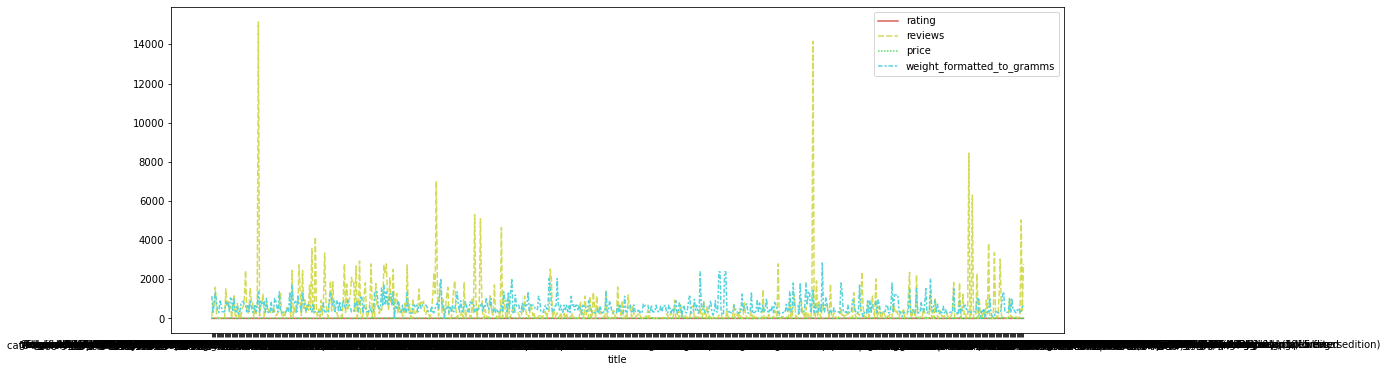

In [90]:
#lets set the figure size to be somewhat large and plot a line plot

plt.figure(figsize=(16,6))
sns.lineplot(data=final_data)

oops! there is not much insights to be gained from here, due to the large size of the data. Let me try to find the correlation between the weight and price. Remember what i said will guide my thoughts for this analysis above? Yeah, lets do this.

To find the correlation between the 'weight_formatted_to_gramms' and 'price', i'd be using a scatterplot with a regression line

<AxesSubplot:xlabel='weight_formatted_to_gramms', ylabel='price'>

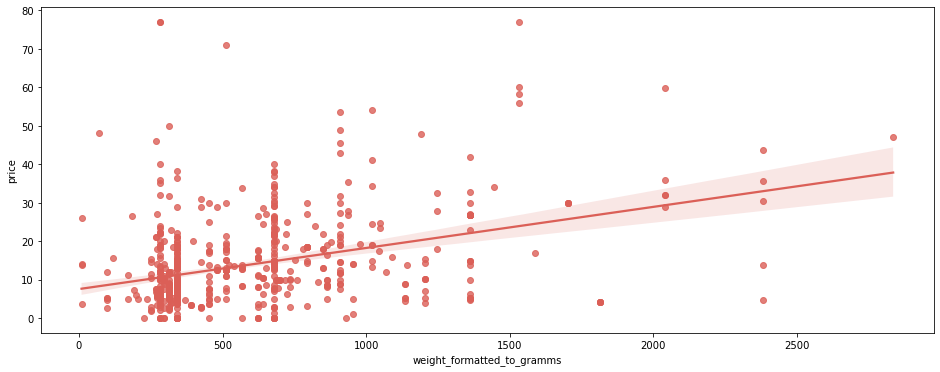

In [91]:
#plotting a scatter plot with a regression line for the weight and price

plt.figure(figsize=(16,6))
sns.regplot(x= 'weight_formatted_to_gramms',y='price', data= final_data)

You would expect from here that the higher the weight, the higher the price (positively correlated), but this isnt so as a lot 'outliers' are seen away from the regression line which is tilting towards the fact that the variables are not really correlated. We can establish this much later in this analysis. For noe lets check another variable

Now, to check if the price of the coffee affects the rating given, i'd use the scatterplot again

<AxesSubplot:xlabel='rating', ylabel='price'>

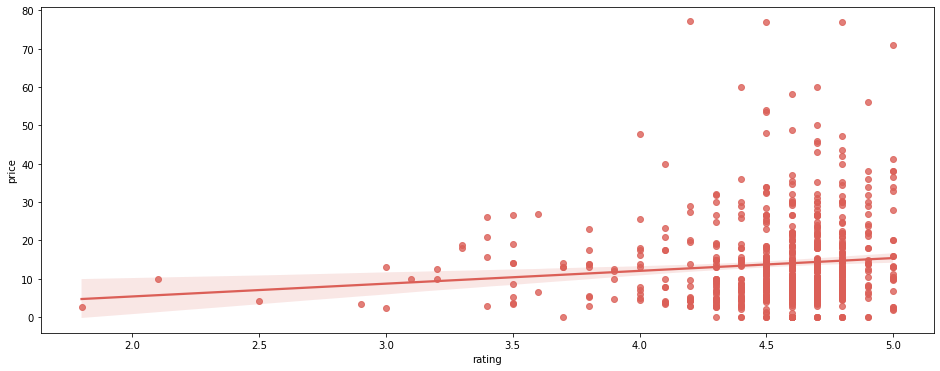

In [92]:
#plotting a scatter plot with regression line for the price and rating

plt.figure(figsize=(16,6))
sns.regplot(x= 'rating',y='price', data= final_data)

Again, you would expect that the higher the price,the higher the rating, but this graph has again proven otherwise because the coffee having more ratings here have relatively lower prices with the  exceptions of few ones which do not. Hence, there is nothing much to see here, lets move ahead. 

Now lets extract some insights from this data and bring out some major stuff. First, we start with the rating. 


Lets check the best rated

In [107]:
#to extract the top best rated, On a scale of 5, a high rating should start from 4 and end at 5, lets see how many we have

final_data.loc[(final_data.rating > 4)]

,coffee_type,rating,reviews,seller_name,price,weight_formatted_to_gramms
title,,,,,,
"café bustelo, espresso style dark roast ground coffee, vacuum-packed 10 oz. brick","espresso,dark roast",4.7,914,walmart.com,3.76,283.5
"folgers classic roast ground coffee, medium roast coffee, 25.9 ounce canister","medium roast,classic roast",4.4,740,walmart.com,9.97,734.3
"great value classic roast medium ground coffee, value size, 48 oz",classic roast,4.7,1598,walmart.com,9.98,1360.8
"great value classic roast medium ground coffee, 30.5 oz",classic roast,4.2,263,walmart.com,7.98,864.7
"folgers black silk ground coffee, smooth dark roast coffee, 33.7ounce canister","black silk ground coffee,dark roast",4.9,20,walmart.com,13.98,955.4
...,...,...,...,...,...,...
"the original donut shop pumpkin caramel cheesecake latte, keurig single serve k-cup pods","caramel,latte",4.1,55,walmart.com,7.92,510.3
"nescafe classico colombia medium roast instant coffee, 6 oz","instant coffee,medium roast",4.7,122,walmart.com,6.28,272.2
"starbucks dark roast coffee with 2x caffeine, k-cup coffee pods, 100% arabica, 12 ct","arabica,dark roast",4.3,5036,walmart.com,12.98,340.2


Oh! wow! we have quite a number of highly rated coffee, 650 out of 703 is a lot! Let's see who sells them. From a glance,i can see that walmart occurs a lot as a sellerin this data, i'd randomly choose to see the number of sales walmart has,just to see

In [135]:
#to determine the coffee with the most number of reviews, i will check for walmart stores first because it occurs often

final_data.loc[final_data.seller_name == 'walmart.com', :]

,coffee_type,rating,reviews,seller_name,price,weight_formatted_to_gramms
title,,,,,,
"great value espresso ground coffee, 10 oz",espresso,3.5,54,walmart.com,3.36,283.5
"chameleon organic coffee guatemala, medium roast, ground coffee, 9 oz",medium roast,4.8,54,walmart.com,14.26,1204.9
"cafe la llave decaf espresso dark roast ground coffee, 8.8 oz","espresso,dark roast",4.4,9,walmart.com,2.88,249.5
"illy ground drip classico medium roast coffee, 8.8 oz",medium roast,4.8,469,walmart.com,14.52,249.5
"peet's coffee french roast, dark roast whole bean coffee, 10.5oz bag","french,french roast,dark roast",4.6,631,walmart.com,9.98,297.7
...,...,...,...,...,...,...
"nescaf clasico decaf dark roast instant coffee, 7 oz.","instant coffee,dark roast",4.7,265,walmart.com,6.32,640.7
"great value classic medium roast instant coffee, 8 oz","instant coffee,medium roast",4.4,292,walmart.com,3.24,793.8
"gevalia mocha latte k-cup espresso coffee pods &amp; latte froth packets, 12 ct box","espresso,mocha,espresso coffee,latte",4.5,5315,walmart.com,13.66,340.2


Walmart alone has 546 inputs!! My instinct was correct, if only walmart can sell 546 out of 703, they are the best seller, no cap! but lets see how others did in terms of sales too....More like 'top best sellers'

In [120]:
#to check the top best sellers,i would first group by seller_name 

group=final_data.groupby('seller_name').agg(len)
group

,coffee_type,rating,reviews,price,weight_formatted_to_gramms
seller_name,,,,,
101cells,1,1,1,1,1
21wayskinnect llc,1,1,1,1,1
54fabulous,1,1,1,1,1
a s group inc,1,1,1,1,1
alfa retailers llc,1,1,1,1,1
...,...,...,...,...,...
vercingetorix llc,1,1,1,1,1
vitaminics inc,1,1,1,1,1
walmart.com,546,546,546,546,546


from this,we have quite a number of sellers having just one rating, review and even price,that means they sold just one. To further determine my top sellers, lets check those that have rating greater than 2

In [125]:
#check ratings greater than 2

group2= group.loc[(group.rating > 2)]
group2

,coffee_type,rating,reviews,price,weight_formatted_to_gramms
seller_name,,,,,
avenue a stores llc,6,6,6,6,6
bestsource officesupplies,6,6,6,6,6
blue monster llc,3,3,3,3,3
cajun supermarket,6,6,6,6,6
door county coffee,8,8,8,8,8
jadas hats,3,3,3,3,3
jesus home depot,3,3,3,3,3
matek online store llc,6,6,6,6,6
metrogoods usa,3,3,3,3,3


Okay, here they are. To aid more visualization, we would plot a barchart

[Text(0, 0, '6'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '7'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '546')]

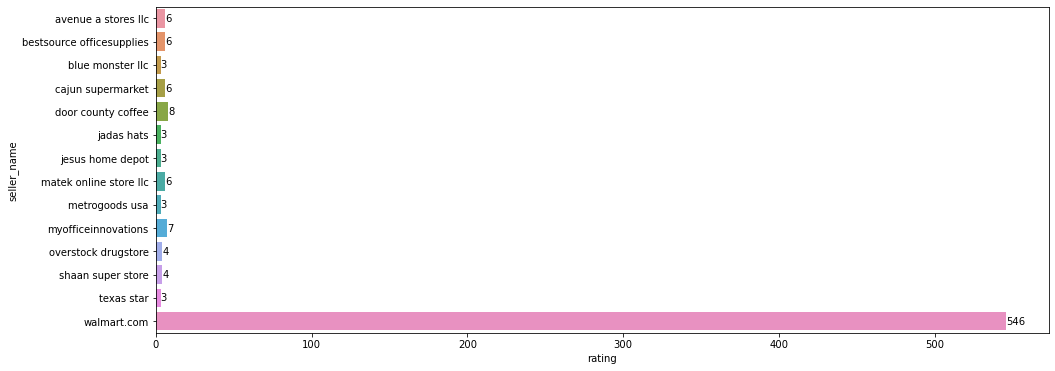

In [183]:
#a barplot to see the top sellers and hoew many they sold

plt.figure(figsize=(16,6))
bar= sns.barplot(x=group2['rating'], y = group2.index)
bar.bar_label(bar.containers[0])

So,here we have them, the second best seller is 'door county coffee' which has just 8 sales compared to walmart with over 540 sales. It is indeed safe to say this analysis is about walmart stores (laugh)

Just to use a line plot to visualize the above insights. Walmart stores hasit

<AxesSubplot:xlabel='seller_name'>

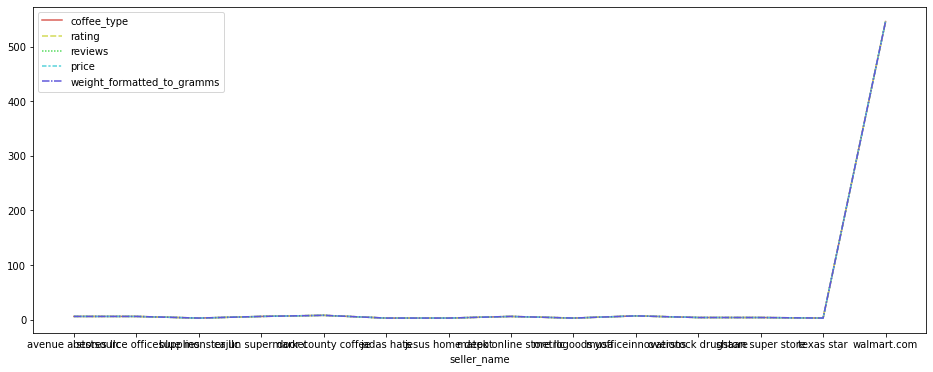

In [138]:
#plotting a lineplotfor the best sellers

plt.figure(figsize=(16,6))
sns.lineplot(data=group2)

Next, we will determine the best reviewed coffee. The coffee that has the highest reviews

In [144]:
#to determine the best reviewed coffee,we would first group by the coffee_type and reviews

review= final_data.groupby('coffee_type').reviews.agg([len, min, max])
review

,len,min,max
coffee_type,,,
"americano,caffe americano,medium dark,medium dark roast,dark roast",1,4,4
arabica,5,1,613
"arabica,dark roast",6,2,5036
"arabica,light roast",1,235,235
"arabica,medium roast",44,8,6301
...,...,...,...
"mocha,instant coffee",1,235,235
"mocha,latte",1,505,505
"mocha,light roast",2,75,432


In [163]:
#then to grouping by the length

group3=final_data.groupby('reviews').agg(len)
group3

,coffee_type,rating,seller_name,price,weight_formatted_to_gramms
reviews,,,,,
1,11,11,11,11,11
2,9,9,9,9,9
3,6,6,6,6,6
4,4,4,4,4,4
5,12,12,12,12,12
...,...,...,...,...,...
6301,1,1,1,1,1
7017,1,1,1,1,1
8446,1,1,1,1,1


From this table '15148' is the highest review, lets check which coffee has it in the next code

In [186]:
#to check the coffee_type with the highest review

final_data.loc[final_data.reviews == 15148, :]

,coffee_type,rating,reviews,seller_name,price,weight_formatted_to_gramms
title,,,,,,
"folgers classic roast ground coffee, medium roast coffee, 48 oz canister","medium roast,classic roast",4.9,15148,walmart.com,13.92,1360.8


This is the coffee with the highest review. coffee_type 'medium roast, classic roast' has it

Now lets use our description of the categorical data to further establish our best seller and get the best selling coffee too 

In [185]:
#to check the categorical datatype

categorical2 = final_data.dtypes[final_data.dtypes=='object'].index
final_data[categorical2].describe()

,coffee_type,seller_name
count,703,703
unique,119,96
top,medium roast,walmart.com
freq,184,546


from this table, it shows that the top coffee is 'medium roast'(occurng 184 times) and is sold by 'walmart.com'
Therefore, walmart.com is our best seller and 'Medium roast' coffee is our best selling coffee

Next, we will determine the best rated coffee. The coffee that has the highest rating

In [184]:
#to determine the best rated coffee, first groupby coffee_type and rating

final_data.groupby('coffee_type').rating.agg([len, min, max])

,len,min,max
coffee_type,,,
"americano,caffe americano,medium dark,medium dark roast,dark roast",1,4.3,4.3
arabica,5,3.2,5.0
"arabica,dark roast",6,4.3,5.0
"arabica,light roast",1,4.7,4.7
"arabica,medium roast",44,3.1,4.9
...,...,...,...
"mocha,instant coffee",1,4.6,4.6
"mocha,latte",1,4.3,4.3
"mocha,light roast",2,4.1,4.3


In [172]:
#we group again by number of occurrences of 'rating'

group4=final_data.groupby('rating').agg(len)
group4

,coffee_type,reviews,seller_name,price,weight_formatted_to_gramms
rating,,,,,
1.8,1,1,1,1,1
2.1,1,1,1,1,1
2.5,1,1,1,1,1
2.9,1,1,1,1,1
3.0,2,2,2,2,2
3.1,1,1,1,1,1
3.2,2,2,2,2,2
3.3,2,2,2,2,2
3.4,4,4,4,4,4


In [167]:
#the highest rating value is '5', so lets see who has it

final_data.loc[final_data.rating == 5, :]

,coffee_type,rating,reviews,seller_name,price,weight_formatted_to_gramms
title,,,,,,
arabica ground 100% coffee 126 pk,arabica,5.0,1,www.hadetech.com,71.00,510.3
"cafe el morro espresso dark roast caffeinated ground coffee, 8.8 oz","espresso,dark roast",5.0,2,walmart.com,1.78,249.5
"kauai coffee na pali coast k-cup coffee pods, dark roast, 24 ct",dark roast,5.0,4,walmart.com,12.94,680.4
"black rifle coffee spirit of '76, medium roast, ground coffee, 12 oz","medium roast,black rifle coffee",5.0,1,walmart.com,12.98,340.2
"black rifle coffee just black single-serve pods, medium roast, 44 ct","medium roast,black rifle coffee",5.0,1,walmart.com,27.94,1247.4
"cafe aroma espresso ground coffee, dark roast caffeinated, 8.8 oz","espresso,dark roast",5.0,1,walmart.com,1.98,249.5
"black rifle coffee just black single-serve pods, medium roast, 22 ct","medium roast,black rifle coffee",5.0,2,walmart.com,15.97,623.7
"black rifle ready-to-drink coffee, espresso mocha, 11oz, can","espresso,mocha",5.0,6,walmart.com,2.68,311.8
"death wish coffee, organic, fair-trade, espresso roast ground, 14oz, bag","espresso,espresso roast",5.0,4,walmart.com,19.97,396.9


These are the highest rated coffee. Oh wow! They are quite a number, you would expect to see the most epensive, weightiest and best selling coffee amongst them but no, this again confirms that there is no correlation between the rating, price, weight and the coffee_type

Next is to check the most expensive coffee.

In [168]:
#lets group the dataframe by the price column

group5=final_data.groupby('price').agg(len)
group5

,coffee_type,rating,reviews,seller_name,weight_formatted_to_gramms
price,,,,,
0.00,29,29,29,29,29
1.00,2,2,2,2,2
1.43,1,1,1,1,1
1.78,1,1,1,1,1
1.98,2,2,2,2,2
...,...,...,...,...,...
60.00,1,1,1,1,1
71.00,1,1,1,1,1
76.99,1,1,1,1,1


The highest price is '77.09', lets see who has it

In [174]:
#checking the details of the highest coffee price

final_data.loc[final_data.price ==77.09, :]

,coffee_type,rating,reviews,seller_name,price,weight_formatted_to_gramms
title,,,,,,
"lavazza perfetto single-serve k-cup® pods for keurig brewer, dark roast, 10-ct boxes (pack of 6)",dark roast,4.2,22,national discount centers,77.09,283.5


This is the most expensive coffee and it can be seen even from here that the price doesn't determine the rating and the weight of the coffee because,if it did, the most expensive coffee should be the best rated(rating of 5) and also have the most weight which is not the case. This insight is consistent with the plot of price against weight above.

Lastly,i would create some density plots to show the distributions of the ratings, weight and price independently

<AxesSubplot:xlabel='rating', ylabel='Density'>

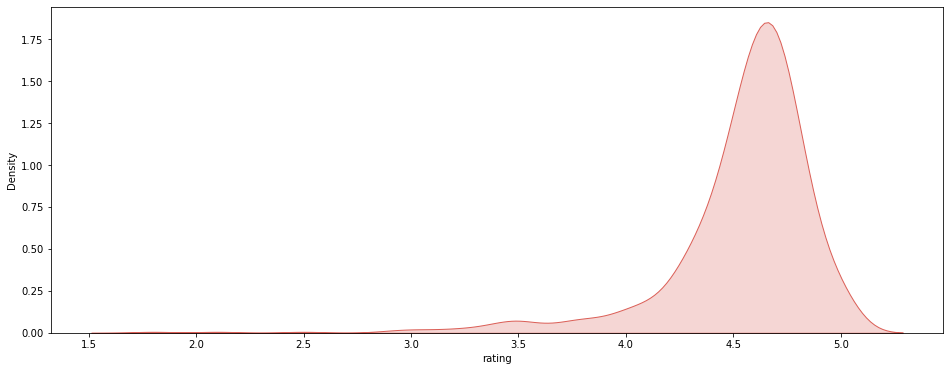

In [175]:
#lets show the distribution of the ratings

plt.figure(figsize=(16,6))
sns.kdeplot(data=final_data['rating'], shade=True)

This chart depicts that the most common coffee rating is between 4.5 to 5.0. Most of the coffee were rated to be nice

<AxesSubplot:xlabel='weight_formatted_to_gramms', ylabel='Density'>

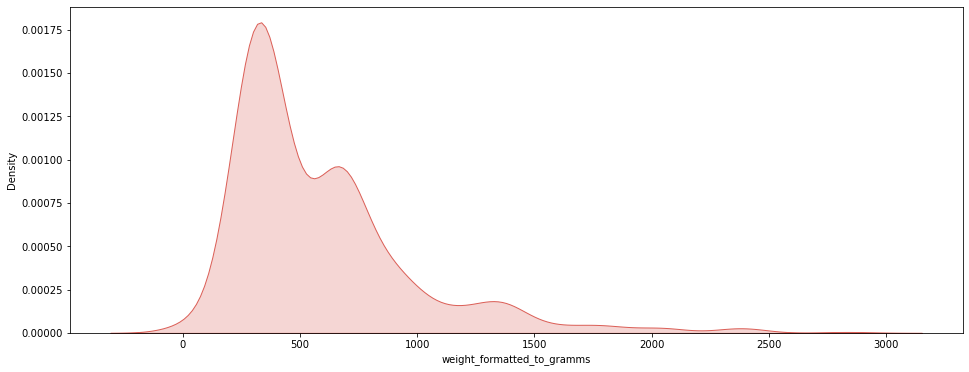

In [187]:
#for the weight

plt.figure(figsize=(16,6))
sns.kdeplot(data=final_data['weight_formatted_to_gramms'], shade=True)

This chart shows that the most popular coffee weight is in between 250-500grams

<AxesSubplot:xlabel='price', ylabel='Density'>

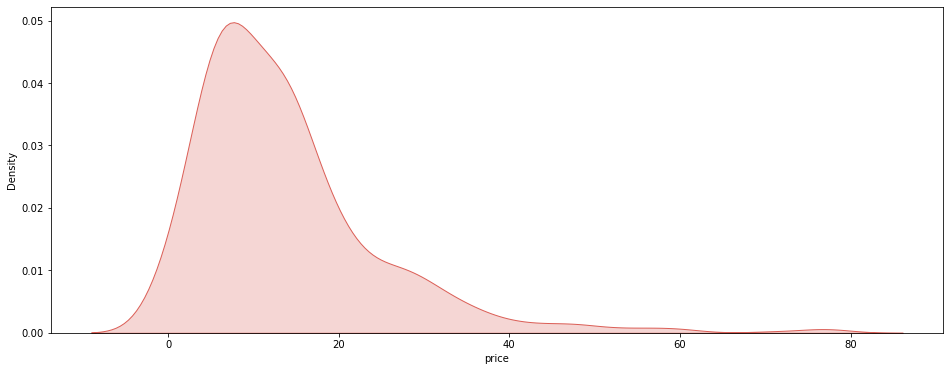

In [188]:
#for the price

plt.figure(figsize=(16,6))
sns.kdeplot(data=final_data['price'], shade=True)

This chat depicts that most of the coffee prices were within the range of 10-20

With this i have come to the end of this analysis, i hope you werent bored and you could understand my data representation and visualization.
Majorly, i was able to clean the data and see the relationships between the variables, i checked for the best seller, best rated coffee, coffee with the highest review, the highest selling coffee. the most expensive coffee, the top best selling stores, the weightiest coffee and i was even able to check the most popular weights of coffee and the prices.